# Анализ данных и состаление прогнозов
# Выявление закономерностей, определяющих успешность игры для поиска потенциально популярных продуктов и планирования рекламных кампаний.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

# Загрузка датасета и изучение данных

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('C:/documents/datasets/games.csv')

In [3]:
display(data)
display(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Мы видим 16715 записей. 2 проуска в имени, 2 пропуска в жанре, 269 пропусков в годе выпуска, 6701 пропуск в оценке пользователей, 6766 пропусков в рейтинге и 8578 пропусков в оценке критиков. 
По типам: оценки пользователей лучше перевести во float

In [4]:
data.duplicated().value_counts()

False    16715
dtype: int64

Явных дубликатов не обнаружено

In [5]:
a = data[['Name', 'Platform', 'Year_of_Release']].duplicated()
display(a.value_counts())
a = data[a].index
data.drop(a, inplace=True)
data.info()

False    16713
True         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16712 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16712 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8136 non-null   float64
 9   User_Score       10013 non-null  object 
 10  Rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:
for i in data:
    display(i, data[i].describe())
    display(data[i].unique())
    print()
    

'Name'

count                           16712
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

'Platform'

count     16713
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

'Year_of_Release'

count    16444.000000
mean      2006.485101
std          5.876309
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

'Genre'

count      16712
unique        12
top       Action
freq        3369
Name: Genre, dtype: object

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

'NA_sales'

count    16713.000000
mean         0.263409
std          0.813647
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sales, dtype: float64

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

'EU_sales'

count    16713.000000
mean         0.145076
std          0.503366
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: EU_sales, dtype: float64

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

'JP_sales'

count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_sales, dtype: float64

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

'Other_sales'

count    16713.000000
mean         0.047348
std          0.186741
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: Other_sales, dtype: float64

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

'Critic_Score'

count    8136.000000
mean       68.965954
std        13.938153
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

'User_Score'

count     10013
unique       96
top         tbd
freq       2424
Name: User_Score, dtype: object

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'Rating'

count     9948
unique       8
top          E
freq      3989
Name: Rating, dtype: object

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В данних по имени присутствуют 11559 уникальных значений, чаще всего встречается Need for Speed: Most Wanted; 31 уникальная платформа, самая популярная PS2; годы выпуска с 1980 по 2016; 12 уникальных жарнов, самый частый Action; продажи в Америке от 0 до 41.3 млн, в среднем 0.26 млн; продажи в Европе от 0 до 28,96 млн, в среднем 0.14 млн; продажи в Японнии от 0 до 10.22 млн, в среднем 0.07 млн; продажи в других странах от 0 до 10.57 млн, в среднем 0.047 млн; Оценки критиков от 13 до 98, в среднем 68; 
Оценки пользователей тип object - уникальных значений 96 и чаще всего встречается tbd (возможно еще не определена); В рейтингах уникальных значений 8 и чаще всего встречается 'E'

# Предобработка данных

### Приводим названия столбцов к нижнему регистру

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.092545,0.003954,-0.168405,0.037806,0.011268
na_sales,-0.092545,1.000000,0.765332,0.449590,0.638646,0.240821
eu_sales,0.003954,0.765332,1.000000,0.435057,0.722789,0.220805
jp_sales,-0.168405,0.449590,0.435057,1.000000,0.291084,0.152629
other_sales,0.037806,0.638646,0.722789,0.291084,1.000000,0.198603
critic_score,0.011268,0.240821,0.220805,0.152629,0.198603,1.000000


Четкой кореляции между столбцами не наблюдается

### оброаботка пропусков

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [10]:
data = data.dropna(subset=['name', 'genre']).reset_index(drop=True)

Видим 1 пропуск имени совпадает с пропуском жанра. В этой строчке пропуске везде кроме даты выпуска и продаж. Не поддаются восстановлению, поэтому удаляем.

In [11]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Теперь пропуски остались только в дате выпуска, ценках и рейтинге - 4 столбца.

In [12]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16370,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16402,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16445,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16455,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
name_genre = data[['name', 'genre']].drop_duplicates()
name_genre = name_genre[name_genre['name'].duplicated()]['name'].unique()
display(data[data['name'].isin(name_genre)].sort_values(by='name'))
data.loc[data['name'] == 'Battlezone', 'genre'] = 'Shooter'
data.loc[data['name'] == 'Culdcept', 'genre'] = 'Strategy'
data.loc[data['name'] == 'Little Busters! Converted Edition', 'genre'] = 'Adventure'
data.loc[data['name'] == 'Syndicate', 'genre'] = 'Shooter'
data.loc[data['name'] == 'Steins;Gate: Hiyoku Renri no Darling', 'genre'] = 'Adventure'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3230,Battlezone,2600,1982.0,Shooter,0.58,0.03,0.00,0.01,NaN,NaN,NaN
13548,Battlezone,PS4,2016.0,Action,0.02,0.02,0.00,0.01,66.0,7,T
14877,Battlezone,PSP,2006.0,Shooter,0.02,0.00,0.00,0.00,57.0,tbd,E10+
8661,Culdcept,3DS,2012.0,Misc,0.00,0.00,0.16,0.00,NaN,NaN,NaN
14631,Culdcept,PS2,2002.0,Strategy,0.01,0.01,0.00,0.00,78.0,8.9,T
13088,Little Busters! Converted Edition,PS2,2009.0,Adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13704,Little Busters! Converted Edition,PSP,2010.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
14933,Little Busters! Converted Edition,PSV,2012.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
11460,Steins;Gate: Hiyoku Renri no Darling,X360,2011.0,Adventure,0.00,0.00,0.08,0.00,NaN,NaN,NaN
12651,Steins;Gate: Hiyoku Renri no Darling,PSP,2012.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN


Были обнаружены 5 игр, которым присвоены разные жанры. Были привидены все к единому жанру, который наиболее часто встречался у игр.

Если игра на всех платформах былы выпoлена в одном году и есть 1 пропущенное значение на одной из платформ, то велика вероятность что и на этой платформе она так же была выпущена в этом же году. Таким образоам удалось восстановить 111 значений года выпуска.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### обработка tbd

In [15]:
data[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16692,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16694,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16695,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16701,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [16]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype(float)

Значение tbd скорее всего означает что оценка не определена. Можем заменить его на пустые значения. Так же меняемт тип на Float

In [17]:
for i in data[data['rating'].isna()]['name'].unique():
    a = data[(data['name']==i) & (data['rating'].notna())]['rating'].unique()
    if len(a)>1:
        display(data[(data['name']==i)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
388,Final Fantasy III,SNES,1994.0,Role-Playing,0.86,0.00,2.55,0.02,NaN,NaN,NaN
801,Final Fantasy III,DS,2006.0,Role-Playing,0.89,0.04,1.07,0.09,77.0,7.1,E10+
1382,Final Fantasy III,NES,1990.0,Role-Playing,0.00,0.00,1.39,0.01,NaN,NaN,NaN
10023,Final Fantasy III,PSP,2012.0,Role-Playing,0.00,0.00,0.11,0.00,NaN,8.9,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1189,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3580,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6409,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
113,Need for Speed Underground 2,PS2,2004.0,Racing,2.71,3.02,0.08,1.09,82.0,8.6,E
695,Need for Speed Underground 2,XB,2004.0,Racing,1.38,0.80,0.00,0.10,77.0,8.7,E
1799,Need for Speed Underground 2,GC,2004.0,Racing,0.70,0.39,0.01,0.03,NaN,NaN,NaN
4472,Need for Speed Underground 2,GBA,2004.0,Racing,0.31,0.12,0.00,0.01,72.0,8.2,E
9356,Need for Speed Underground 2,DS,2005.0,Racing,0.11,0.02,0.00,0.01,65.0,7.0,E
11804,Need for Speed Underground 2,PC,2004.0,Racing,0.00,0.06,0.00,0.01,82.0,8.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1380,Ridge Racer,PSP,2004.0,Racing,0.36,0.44,0.32,0.27,88.0,8.2,E
2581,Ridge Racer,PS,1994.0,Racing,0.00,0.00,0.74,0.05,NaN,NaN,NaN
8220,Ridge Racer,PSV,2011.0,Racing,0.03,0.07,0.05,0.02,44.0,3.7,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2617,Doom,PS,1994.0,Shooter,0.43,0.30,0.0,0.05,NaN,NaN,NaN
9069,Doom,GBA,2001.0,Shooter,0.10,0.04,0.0,0.00,81.0,8.5,T
14608,Doom,PC,1992.0,Shooter,0.02,0.00,0.0,0.00,85.0,8.2,M


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
227,Tony Hawk's Pro Skater 2,PS,2000.0,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T
1714,Tony Hawk's Pro Skater 2,GBA,2001.0,Sports,0.85,0.31,0.00,0.02,95.0,7.5,E
2689,Tony Hawk's Pro Skater 2,N64,2001.0,Sports,0.59,0.16,0.00,0.01,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2964,Shrek the Third,X360,2007.0,Action,0.54,0.09,0.0,0.06,NaN,NaN,NaN
4072,Shrek the Third,PS2,2007.0,Action,0.40,0.02,0.0,0.07,56.0,6.1,E10+
5696,Shrek the Third,PSP,2007.0,Action,0.08,0.15,0.0,0.09,57.0,NaN,E10+
5931,Shrek the Third,DS,NaN,Action,0.26,0.01,0.0,0.02,70.0,6.5,E
6136,Shrek the Third,Wii,2007.0,Action,0.25,0.01,0.0,0.02,57.0,6.7,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3230,Battlezone,2600,1982.0,Shooter,0.58,0.03,0.0,0.01,NaN,NaN,NaN
13548,Battlezone,PS4,2016.0,Shooter,0.02,0.02,0.0,0.01,66.0,7.0,T
14877,Battlezone,PSP,2006.0,Shooter,0.02,0.00,0.0,0.00,57.0,NaN,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3553,The Incredible Hulk,GBA,2003.0,Action,0.40,0.15,0.0,0.01,NaN,NaN,NaN
5015,The Incredible Hulk,PS2,2008.0,Action,0.32,0.01,0.0,0.05,50.0,6.0,T
5785,The Incredible Hulk,Wii,2008.0,Action,0.28,0.01,0.0,0.02,46.0,NaN,T
6429,The Incredible Hulk,X360,2008.0,Action,0.22,0.02,0.0,0.02,55.0,6.4,T
6452,The Incredible Hulk,PS3,2008.0,Action,0.22,0.02,0.0,0.02,55.0,6.8,T
6872,The Incredible Hulk,DS,2008.0,Action,0.22,0.00,0.0,0.02,50.0,NaN,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2785,Madagascar: Escape 2 Africa,DS,2008.0,Action,0.41,0.25,0.0,0.07,55.0,NaN,E
3662,Madagascar: Escape 2 Africa,Wii,2008.0,Action,0.31,0.18,0.0,0.05,NaN,NaN,NaN
5039,Madagascar: Escape 2 Africa,PS2,2008.0,Action,0.12,0.00,0.0,0.26,56.0,5.8,E
6680,Madagascar: Escape 2 Africa,X360,2008.0,Action,0.12,0.10,0.0,0.03,62.0,NaN,E10+
7015,Madagascar: Escape 2 Africa,PS3,2008.0,Action,0.12,0.08,0.0,0.03,58.0,6.8,E10+
16542,Madagascar: Escape 2 Africa,PC,2008.0,Action,0.01,0.00,0.0,0.00,58.0,8.0,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1497,Madagascar,PS2,2005.0,Platform,0.78,0.45,0.0,0.07,69.0,7.4,E10+
2319,Madagascar,GBA,2005.0,Platform,0.62,0.24,0.0,0.03,71.0,NaN,E
3049,Madagascar,GC,2005.0,Platform,0.52,0.13,0.0,0.02,70.0,NaN,E10+
5858,Madagascar,DS,2005.0,Platform,0.25,0.03,0.0,0.02,NaN,NaN,NaN
6212,Madagascar,XB,2005.0,Platform,0.21,0.06,0.0,0.01,71.0,NaN,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7005,Puss in Boots,X360,2011.0,Action,0.20,0.02,0.0,0.02,NaN,NaN,NaN
7341,Puss in Boots,Wii,2011.0,Action,0.19,0.01,0.0,0.01,NaN,NaN,E10+
10644,Puss in Boots,DS,2011.0,Action,0.08,0.01,0.0,0.01,NaN,NaN,E
11256,Puss in Boots,PS3,2011.0,Action,0.07,0.01,0.0,0.01,70.0,7.0,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7583,WRC: FIA World Rally Championship,PS3,NaN,Racing,0.00,0.14,0.01,0.04,68.0,4.5,NaN
9826,WRC: FIA World Rally Championship,X360,NaN,Racing,0.00,0.10,0.00,0.02,66.0,6.0,E10+
14232,WRC: FIA World Rally Championship,PSP,2005.0,Racing,0.02,0.01,0.00,0.00,67.0,7.8,E
16178,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5452,Harry Potter and the Deathly Hallows - Part 2,X360,2011.0,Action,0.19,0.11,0.0,0.03,44.0,5.4,T
5506,Harry Potter and the Deathly Hallows - Part 2,Wii,2011.0,Action,0.17,0.13,0.0,0.03,47.0,6.6,T
5602,Harry Potter and the Deathly Hallows - Part 2,PS3,2011.0,Action,0.14,0.13,0.0,0.05,43.0,5.7,T
7340,Harry Potter and the Deathly Hallows - Part 2,DS,2011.0,Action,0.10,0.09,0.0,0.02,55.0,NaN,E10+
10695,Harry Potter and the Deathly Hallows - Part 2,PC,2011.0,Action,0.05,0.04,0.0,0.01,43.0,5.0,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
249,Tony Hawk's Pro Skater 3,PS2,2001.0,Sports,2.66,1.29,0.01,0.46,97.0,7.5,T
1087,Tony Hawk's Pro Skater 3,PS,2001.0,Sports,1.09,0.49,0.02,0.07,87.0,8.3,E
2503,Tony Hawk's Pro Skater 3,GC,2001.0,Sports,0.64,0.17,0.00,0.02,91.0,9.0,T
3641,Tony Hawk's Pro Skater 3,XB,2002.0,Sports,0.34,0.18,0.00,0.02,93.0,8.4,T
3863,Tony Hawk's Pro Skater 3,GBA,2002.0,Sports,0.37,0.14,0.00,0.01,90.0,8.0,E
11497,Tony Hawk's Pro Skater 3,N64,2002.0,Sports,0.06,0.02,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12133,Legend of Kay,PS4,2015.0,Action,0.02,0.03,0.0,0.01,NaN,NaN,NaN
12476,Legend of Kay,DS,2010.0,Action,0.06,0.00,0.0,0.00,NaN,NaN,E
13024,Legend of Kay,PS2,2005.0,Action,0.03,0.02,0.0,0.01,72.0,7.3,E10+
13079,Legend of Kay,WiiU,2015.0,Action,0.03,0.02,0.0,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3097,Monster Jam: Maximum Destruction,PS2,2002.0,Racing,0.32,0.25,0.0,0.08,47.0,6.0,T
10522,Monster Jam: Maximum Destruction,GBA,2002.0,Racing,0.07,0.03,0.0,0.00,58.0,NaN,E
13416,Monster Jam: Maximum Destruction,GC,2002.0,Racing,0.04,0.01,0.0,0.00,NaN,NaN,NaN


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Причиной пропусков в датасете могут быть как человеческий фактор при занесении данных, так и техническая обшибка при импорте/экспорте данных. Остальные пропуски мы оставляем без обработки

### Поситать суммарные продажи во всех регионах и записать их в отдельный столбец.

In [19]:
data['total_sales_plat'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16712 non-null  object 
 1   platform          16712 non-null  object 
 2   year_of_release   16443 non-null  float64
 3   genre             16712 non-null  object 
 4   na_sales          16712 non-null  float64
 5   eu_sales          16712 non-null  float64
 6   jp_sales          16712 non-null  float64
 7   other_sales       16712 non-null  float64
 8   critic_score      8136 non-null   float64
 9   user_score        7589 non-null   float64
 10  rating            9948 non-null   object 
 11  total_sales_plat  16712 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


Вывод: Мы получили датасет 16715 записей. 2 проуска в имени, 2 пропуска в жанре, 269 пропусков в годе выпуска, 6701 пропуск в оценке пользователей, 6766 пропусков в рейтинге и 8578 пропусков в оценке критиков. 
По типам: оценки пользователей лучше перевести во float
Явных дубликотов не оказалась, но были обнаружены и удалены 2 неявных.
Привели названия столбцов к нижнему регистру.
Удалили строчку где нет названия и жанра - не поддается восстановлению
Если игра на всех платформах былы выпoлена в одном году и есть 1 пропущенное значение на одной из платформ, то велика вероятность что и на этой платформе она так же была выпущена в этом же году. Таким образоам удалось восстановить 111 значений года выпуска.
Были обнаружены 5 игр, которым присвоены разные жанры. Были привидены все к единому жанру, который наиболее часто встречался у игр.
Значение tbd скорее всего означает что оценка не определена. Можем заменить его на пустые значения. Так же меняемт тип на Float

# Исследовательский анализ данных

### Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

,year_of_release
count,11426.000000
mean,2005.763921
std,6.072816
min,1980.000000
25%,2002.000000
50%,2007.000000
75%,2010.000000
max,2016.000000


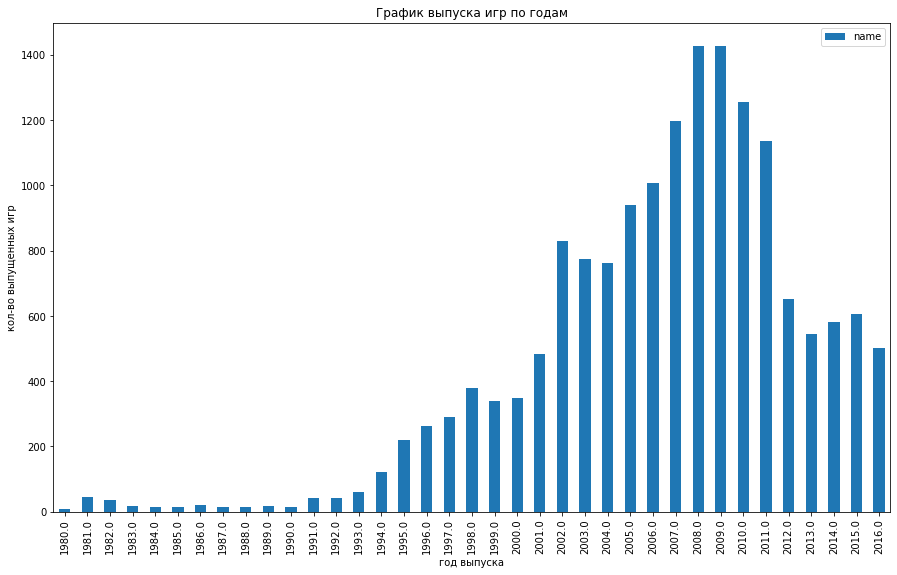

In [20]:
data1 = data.pivot_table(index='name', values='year_of_release')
display(data1.describe())
data1 = data.reset_index().pivot_table(index='year_of_release', values='name', aggfunc='count')
data1.plot.bar(figsize=(15,9), title='График выпуска игр по годам', xlabel='год выпуска', ylabel='кол-во выпущенных игр');

Всего было выпущено 11426 игр с 1980 по 2016 год, в среднем 2005 игр в год. Большая часть игр выпущена с 2002 по 2010 год.

### Посмотрть, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
data2 = data.pivot_table(index='platform', values='total_sales_plat', 
                 aggfunc='sum').sort_values(by='total_sales_plat', ascending=False)
display(data2)
display(data2.describe())
a=data.loc[data['total_sales_plat']>2, 'platform'].unique()
display(a)
data2 = data[data['platform'].isin(a)]
data2 = data2.pivot_table(index=['platform', 'year_of_release'], values='total_sales_plat', 
                 aggfunc='sum')

,total_sales_plat
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


,total_sales_plat
count,31.000000
mean,287.525161
std,348.219405
min,0.030000
25%,22.150000
50%,200.040000
75%,304.095000
max,1255.770000


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC'], dtype=object)

Находим сумарные продажи по платформам и выбираем 22 наиболее крупных по продажам

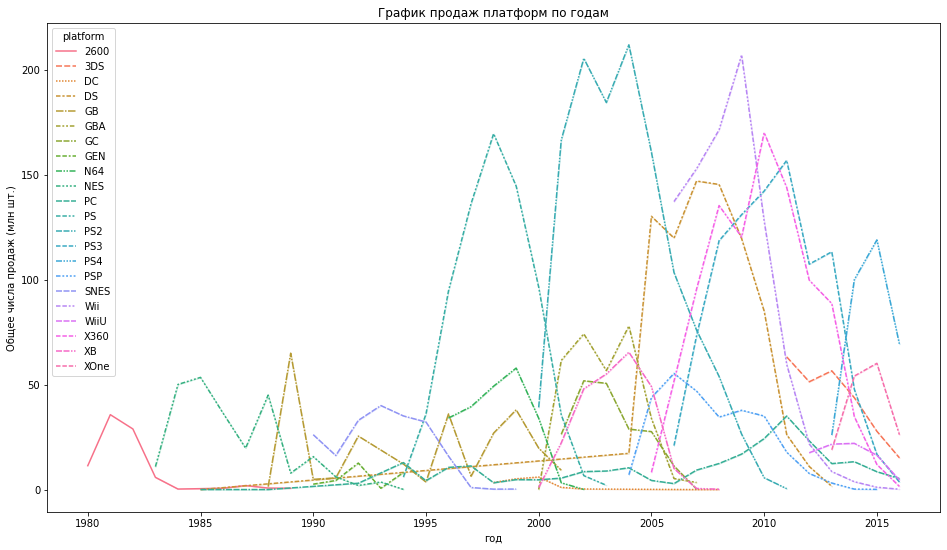

In [22]:
data3 = data2.reset_index()
order = data3['year_of_release']
df = data3.pivot_table(index='year_of_release', columns='platform', values='total_sales_plat')
df = df.reindex(order, axis=0)
fig, ax = plt.subplots(figsize=(16, 9))
plt.title('График продаж платформ по годам')
plt.xlabel('год')
plt.ylabel('Общее числа продаж (млн шт.)')
sb.lineplot(data=df)
plt.show;

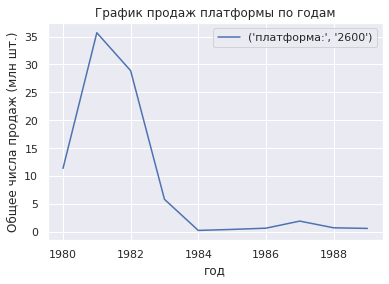

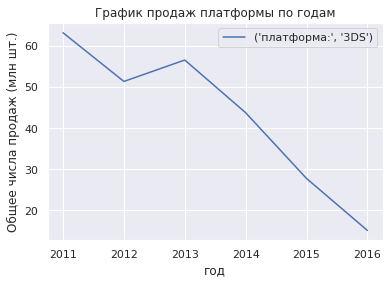

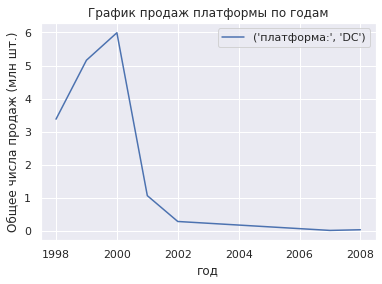

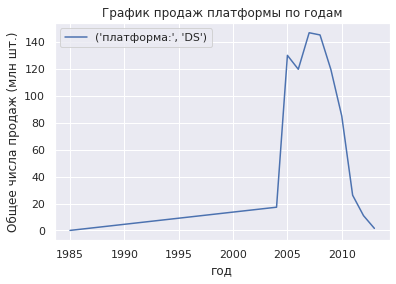

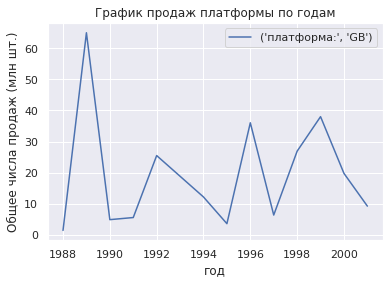

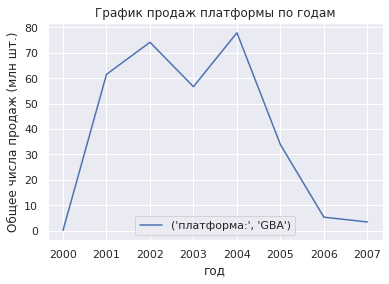

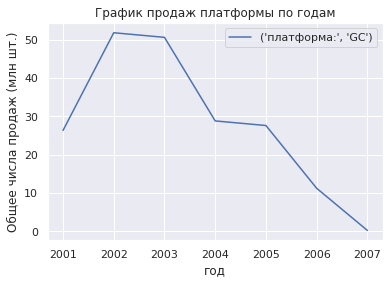

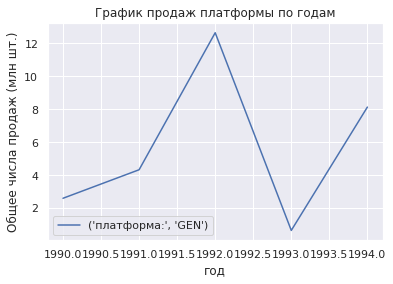

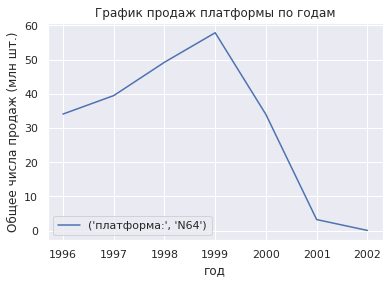

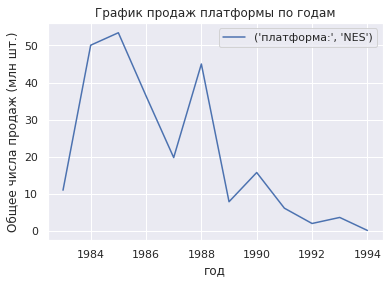

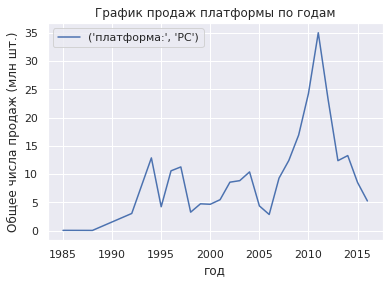

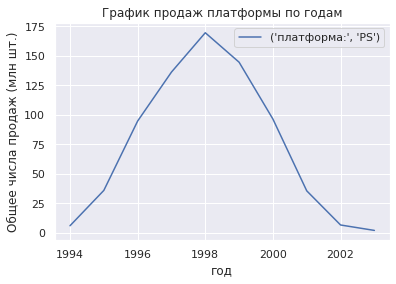

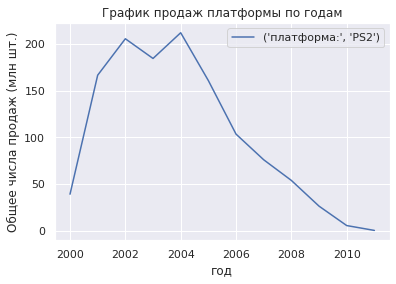

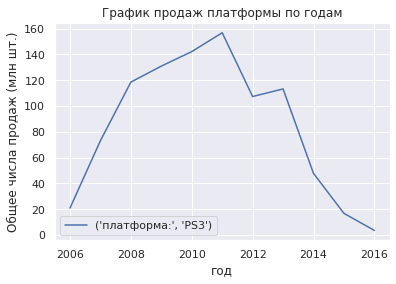

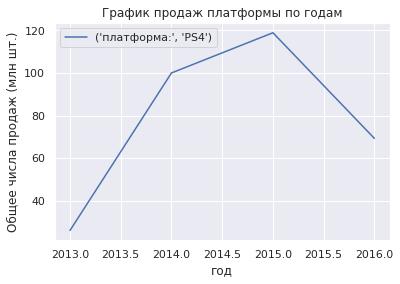

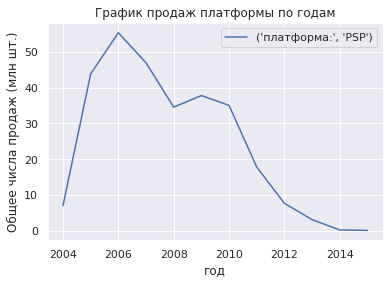

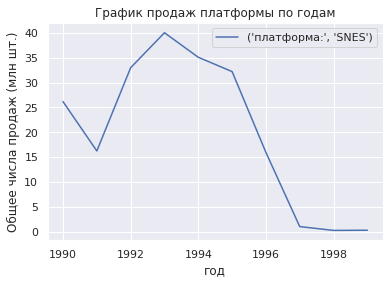

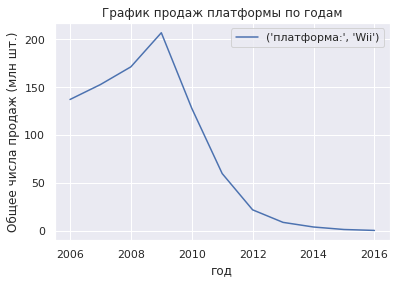

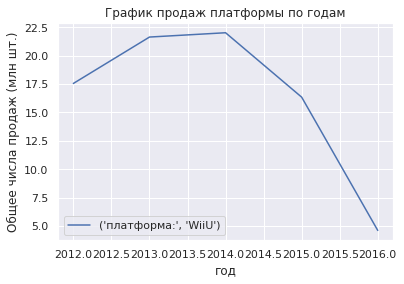

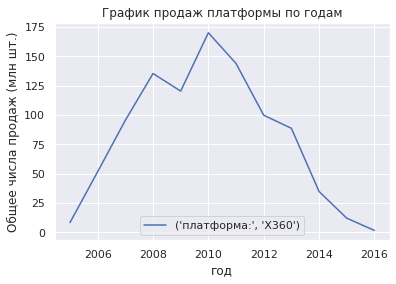

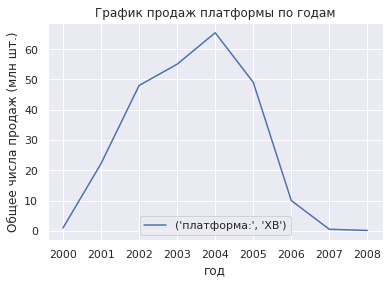

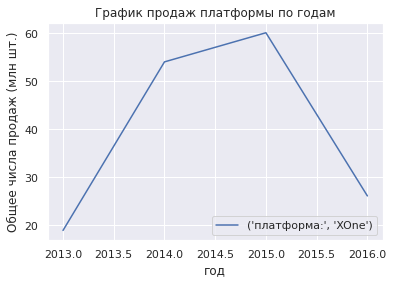

In [23]:
for i in data3['platform'].unique():
    sb.set_theme(style="darkgrid")
    sb.lineplot(x = "year_of_release", y = "total_sales_plat", data = data3[data3['platform']==i], label=('платформа:', i))
    plt.title('График продаж платформы по годам')
    plt.xlabel('год')
    plt.ylabel('Общее числа продаж (млн шт.)')
    plt.show()

Мы видим в среднем что от 2 до 5 лет набирает пополярность и потом переходит к спаду каждая платформа и почти каждая платформа за это период сменяется на другую.

### Какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.

,total_sales_plat
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
Wii,5.07
PSP,0.36


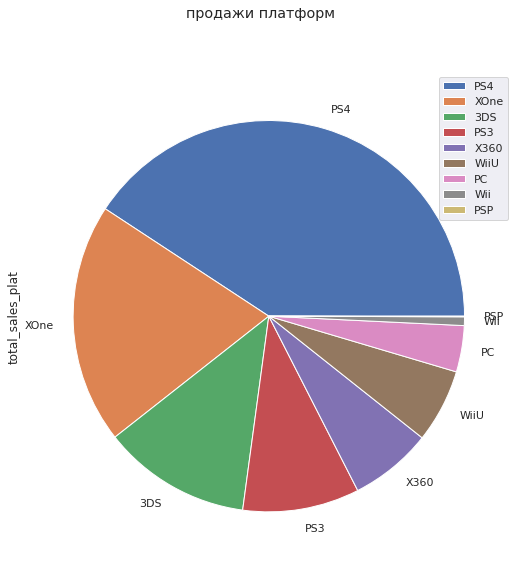

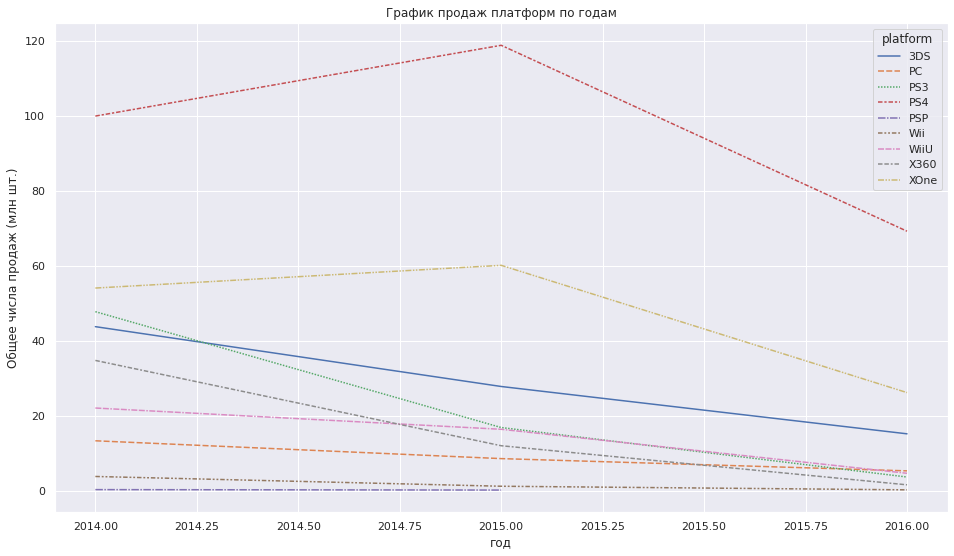

In [24]:
data4 = data3[data3['year_of_release']>2013]
data5 = data4.pivot_table(index='platform', 
                          values='total_sales_plat', aggfunc='sum').sort_values(by='total_sales_plat',ascending=False)
display(data5)
data5.plot(kind='pie', subplots=True, figsize=(9, 9), title='продажи платформ');
order = data4['year_of_release']
df = data4.pivot_table(index='year_of_release', columns='platform', values='total_sales_plat')
fig, ax = plt.subplots(figsize=(16, 9))
plt.title('График продаж платформ по годам')
plt.xlabel('год')
plt.ylabel('Общее числа продаж (млн шт.)')
sb.lineplot(data=df)
plt.show;

In [25]:
data6 = data.pivot_table(index='name', values='total_sales_plat', 
                 aggfunc='sum').sort_values(by='total_sales_plat', ascending=False)
display(data6.head(10))

,total_sales_plat
name,
Wii Sports,82.54
Grand Theft Auto V,56.58
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.52
Wii Sports Resort,32.77
Pokemon Red/Pokemon Blue,31.38
Call of Duty: Black Ops,30.82
Call of Duty: Modern Warfare 3,30.60


Возьмеме даннные по платформам за последние 3 года. Мы видим что на ибольшей популярностью пользуются PS4, Xone, 3Ds. На них и нужно делать ставыку в разработке на 2017 год. Так же мы вимдим наиболее популярные игры - Wii Sports, Grand Theft Auto V, Super Mario Bros.	Последние годы продажи по всем платформам падают.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Потенциально прибыльные платформы ты определил верно! </div>

### Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам

,platform,total_sales_plat
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,Wii,5.07
8,PSP,0.36


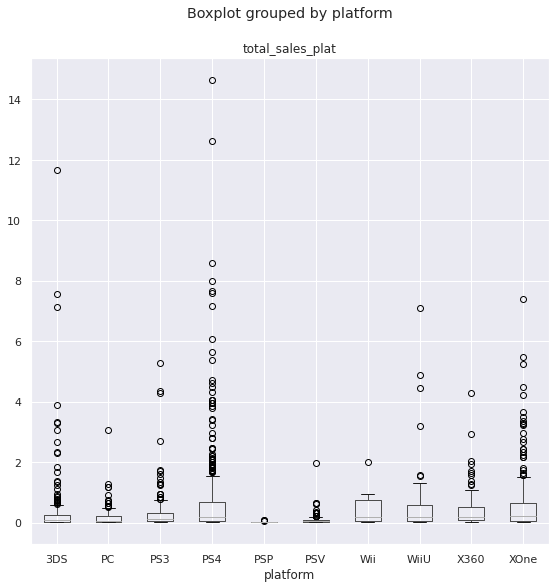

In [26]:
data7 = data3[data3['year_of_release']>2013]
data8 = data7.pivot_table(index='platform', 
                          values='total_sales_plat', aggfunc='sum').sort_values(by='total_sales_plat', 
                                                                                ascending=False).reset_index()
display(data8)
b = data8.loc[data8['total_sales_plat']>10, 'platform'].unique()
data9 = data.loc[(data['year_of_release']>2013)].reset_index()
data9.boxplot(column='total_sales_plat', by='platform', figsize=(9,9));

За 2014-2016 годы потенциально наиболее прибыльнмыи могту явлться платформы PS4, XOne и 3DS. На основнаии ящика с усами мы видимо что большая часть продаж игр в разбиввке по 3-м лидирующим платформам за 2016 год имеет примерно одинаековую медиану и большая часть значений нахоодится в интервале от 0 до 0.8 млн штук. В лилирующих платформах выделяются много значений выше среднего, которые по определению графика - могут являться вбросами. 

### Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

платформа PS4


,total_sales_plat,critic_score,user_score
total_sales_plat,1.000,0.403,-0.040
critic_score,0.403,1.000,0.546
user_score,-0.040,0.546,1.000


платформа XOne


,total_sales_plat,critic_score,user_score
total_sales_plat,1.000,0.429,-0.070
critic_score,0.429,1.000,0.441
user_score,-0.070,0.441,1.000


платформа 3DS


,total_sales_plat,critic_score,user_score
total_sales_plat,1.000,0.314,0.215
critic_score,0.314,1.000,0.862
user_score,0.215,0.862,1.000


платформа PS3


,total_sales_plat,critic_score,user_score
total_sales_plat,1.000,0.447,-0.167
critic_score,0.447,1.000,0.693
user_score,-0.167,0.693,1.000


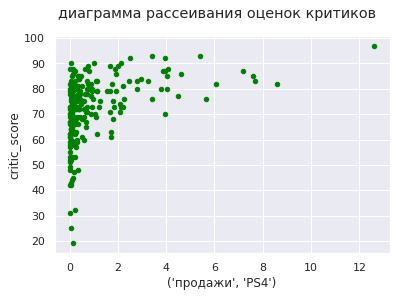

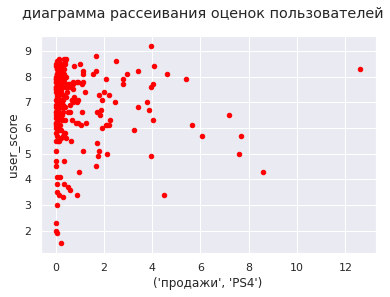

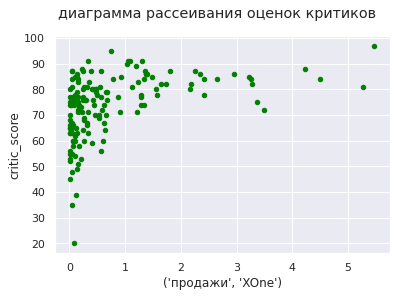

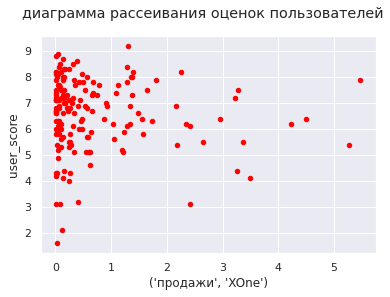

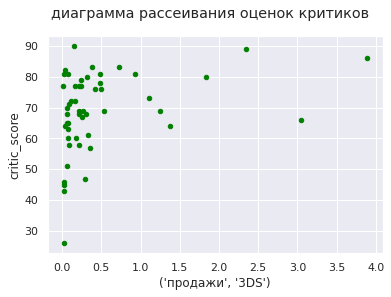

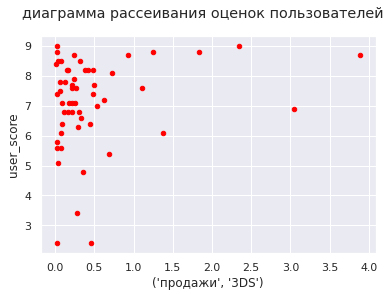

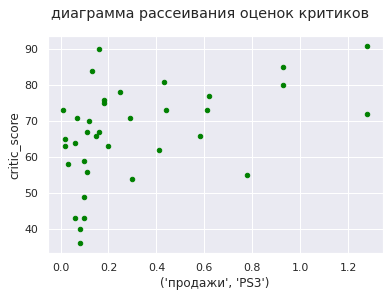

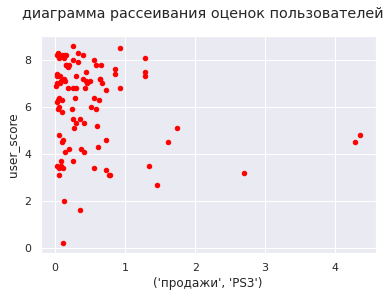

In [27]:
for i in ['PS4', 'XOne', '3DS', 'PS3']:
    data10 = data9[['platform', 'total_sales_plat', 'critic_score', 'user_score']].query('platform == @i')
    print('платформа', i)
    display(data10.corr().round(3))
    data10.plot.scatter(x = 'total_sales_plat', y = 'critic_score', c='green', subplots=True,
                        title='диаграмма рассеивания оценок критиков', xlabel=('продажи', i));
    data10.plot.scatter(x = 'total_sales_plat', y = 'user_score', c='red', subplots=True,
                        title='диаграмма рассеивания оценок пользователей', xlabel=('продажи', i));

Мы наблюдаем небольшую прямую зависмость общих продаж по платформам от отзывов критиков.И еще меньшую обратную зависиомсть от отзывов пользователей.

In [28]:
data11 = data9[['platform', 'total_sales_plat', 'critic_score', 'user_score']]
data11.corr().round(3)

,total_sales_plat,critic_score,user_score
total_sales_plat,1.000,0.328,-0.013
critic_score,0.328,1.000,0.504
user_score,-0.013,0.504,1.000


Если звять корреляцию по всем играм и всем платформам общих продаж и отзывов, мы видимо что отзывы не оказывают решающего влияния на продажи

### Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах?

,name,genre
count,956,956
unique,956,12
top,Hakuoki: Shinkai - Hana no Shou,Action
freq,1,337


,genre,sales_mean,sales_count
0,Shooter,1.325504,129
1,Sports,0.680000,161
2,Platform,0.476053,38
3,Fighting,0.470333,60
4,Role-Playing,0.459005,221
5,Racing,0.398841,69
6,Misc,0.332301,113
7,Action,0.322508,618
8,Simulation,0.298409,44
9,Puzzle,0.157857,14


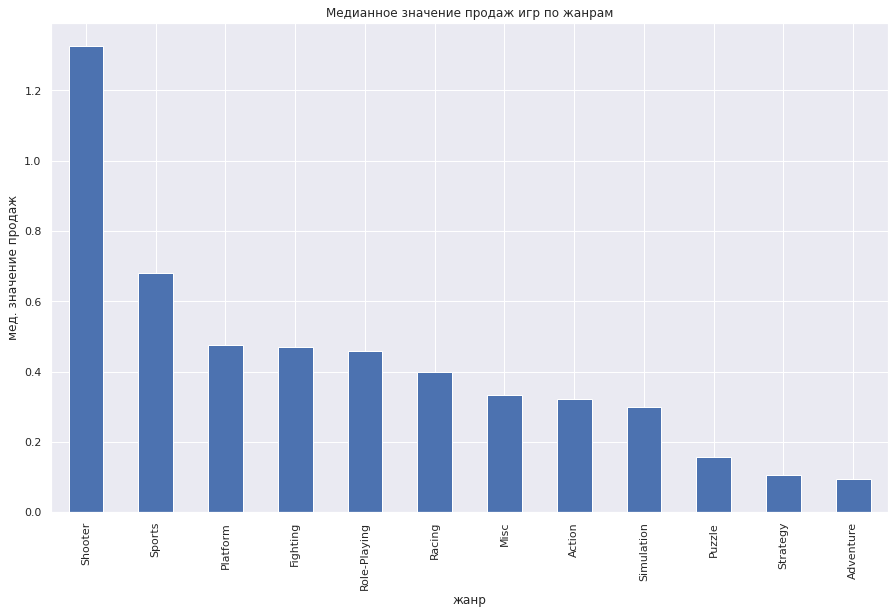

In [29]:
data14_15 = data.query('year_of_release>2013')
data12 = data14_15[['name', 'genre']].drop_duplicates()
display(data12.describe())

data14_15 = data14_15.pivot_table(index='genre', values='total_sales_plat', aggfunc=['mean', 'count']).reset_index()
data14_15.columns = ['genre', 'sales_mean', 'sales_count']
display(data14_15.sort_values(by='sales_mean', ascending=False).reset_index(drop=True))
data14_15.sort_values(by='sales_mean', ascending=False).plot.bar(x='genre', 
                                                                 y='sales_mean', figsize=(15,9), 
                                                                 title='Медианное значение продаж игр по жанрам', 
                                                                 xlabel='жанр', ylabel='мед. значение продаж', legend=False);

Всего в датасете за 2014-2016г. 12 жанров и 956 игр. Чаще всего встречаются игры в жанре Action и меньше всего в Puzzle. Топ 3 жанра с наиболее высоким медианным показателем продаж: Shooter, Sports, Platform.

### Портрет пользователя каждого региона: Самые популярные платформы (топ-5). Опишите различия в долях продаж.

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


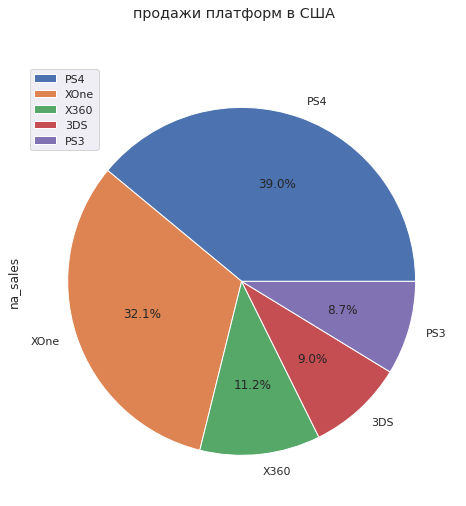

In [30]:
na = data.query('year_of_release>2013').pivot_table(index='platform', values='na_sales', 
                                                    aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
display(na)
na.plot(kind='pie', subplots=True, autopct='%.1f%%', figsize=(8, 8), title='продажи платформ в США');

Самые больше продажи в США были по платформе PS4. Топ 5 платформ по продажам: PS4, XOne, X360, 3DS, PS3. Первые 2 составляют 71% от всех пролдаж 

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


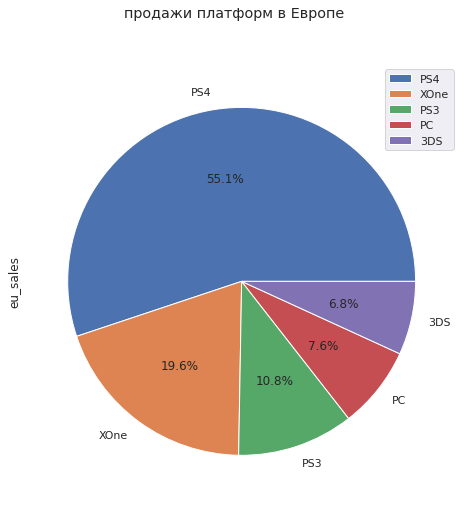

In [31]:
na = data.query('year_of_release>2013').pivot_table(index='platform', values='eu_sales', 
                                                    aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
display(na)
na.plot(kind='pie', subplots=True, autopct='%.1f%%', figsize=(8, 8), title='продажи платформ в Европе');

В Еврое похожий на США рейтинг платформ по продажам от США. Перое место PS4 - 55%. Рейтинг Европы PS4, XOne, PS3, PC, 3DS.

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


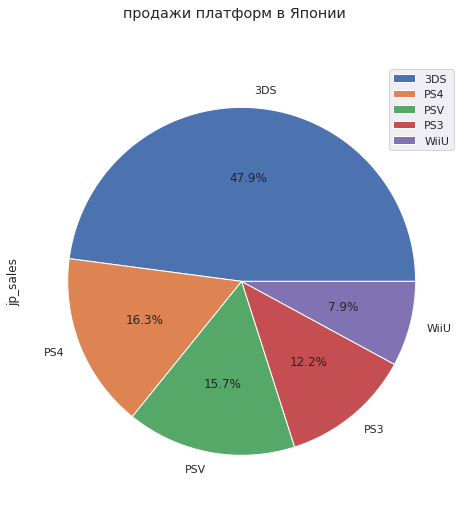

In [32]:
na = data.query('year_of_release>2013').pivot_table(index='platform', values='jp_sales', 
                                                    aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
display(na)
na.plot(kind='pie', subplots=True, autopct='%.1f%%', figsize=(8, 8), title='продажи платформ в Японии');

Япония отличаиеся от США и Европы. На 1 месте платформа 3DS - 48%. Второе место делят PS4 и PSV - примерно по 16% у каждой. Рейтинг Японии по платформам 3DS, PS4, PSV, PS3, WiiU.

### Портрет пользователя каждого региона: Самые популярные жанры (топ-5)

,na_sales
genre,
Shooter,79.04
Action,72.51
Sports,46.13
Role-Playing,33.47
Misc,15.05


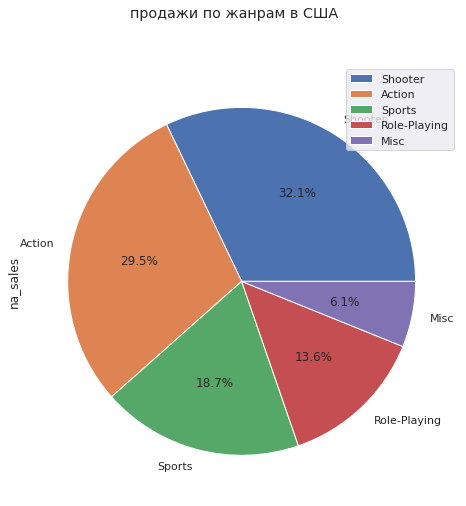

In [33]:
na = data.query('year_of_release>2013').pivot_table(index='genre', values='na_sales', 
                                                    aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
display(na)
na.plot(kind='pie', subplots=True, autopct='%.1f%%', figsize=(8, 8), title='продажи по жанрам в США');

На 1 месте в США продаются игры жанра Shooter. Топ 5 по жанрам: Shooter, Action, Sports, Role-Playing, Misc. Первые два вместе более 60%.

,eu_sales
genre,
Action,74.66
Shooter,65.54
Sports,45.73
Role-Playing,28.17
Racing,14.13


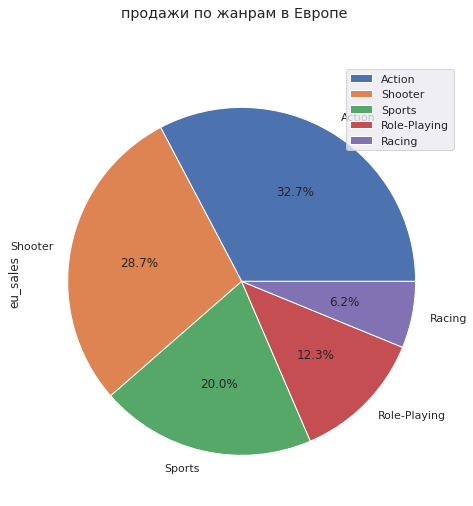

In [34]:
na = data.query('year_of_release>2013').pivot_table(index='genre', values='eu_sales', 
                                                    aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
display(na)
na.plot(kind='pie', subplots=True, autopct='%.1f%%', figsize=(8, 8), title='продажи по жанрам в Европе');

В Европе первая тройка жанров игр совпадает с США. На первом месте Action. Дальше идут: Shooter, Spotrs, Role-Playing, Racing

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


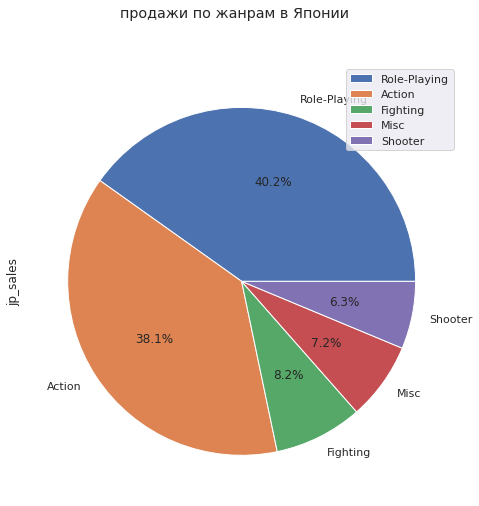

In [35]:
na = data.query('year_of_release>2013').pivot_table(index='genre', values='jp_sales', 
                                                    aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
display(na)
na.plot(kind='pie', subplots=True, autopct='%.1f%%', figsize=(8, 8), title='продажи по жанрам в Японии');

В Японнии рейтинг игр по жанрам отличается от США и Европы. На первом месте Role-Playing. Дальше идут: Action, Fighting, Misc, Shooter

### Портрет пользователя каждого региона: Самые популярные жанры (топ-5) Влияет ли рейтинг ESRB на продажи в отдельном регионе

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


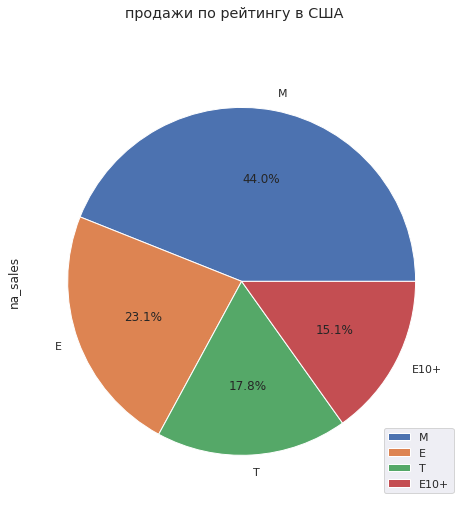

In [36]:
na = data.query('year_of_release>2013').pivot_table(index='rating', values='na_sales', 
                                                    aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
display(na)
na.plot(kind='pie', subplots=True, autopct='%.1f%%', figsize=(8, 8), title='продажи по рейтингу в США');

В США наибольше популярностью по продажам пользуется рейтинг игр M -  44%. 

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


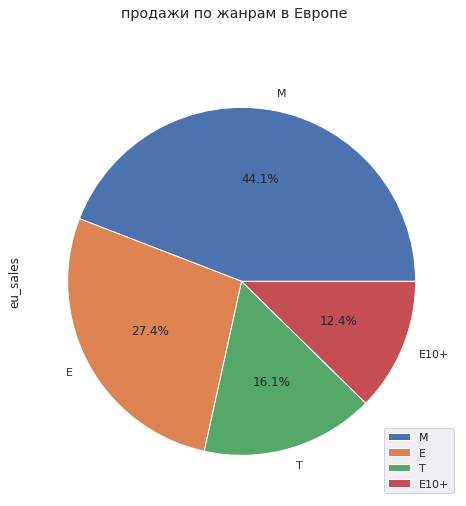

In [37]:
na = data.query('year_of_release>2013').pivot_table(index='rating', values='eu_sales', 
                                                    aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
display(na)
na.plot(kind='pie', subplots=True, autopct='%.1f%%', figsize=(8, 8), title='продажи по жанрам в Европе');

В Европе так же наибольше популярностью по продажам пользуется рейтинг игр M- более 44%. 

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


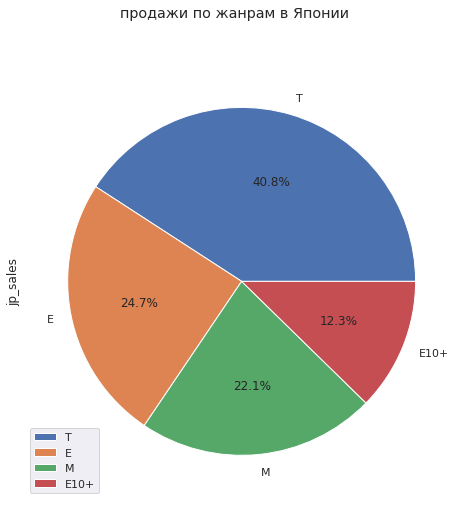

In [38]:
na = data.query('year_of_release>2013').pivot_table(index='rating', values='jp_sales', 
                                                    aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
display(na)
na.plot(kind='pie', subplots=True, autopct='%.1f%%', figsize=(8, 8), title='продажи по жанрам в Японии');

В Японнии же наибольше популярностью по продажам пользуется рейтинг игр T - более 40%.
Таким образом можно сказать что рейтирга США и Европы местами похож, а в Японии отличаются.

In [39]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_plat
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16707,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16709,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


# Проверка гипотез

Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Принимаем за нулевую гипотезу, что средние значения пользовательких рейтингов платформ Xbox One и PC равны, а за алтернатиыную гипотезу, что что средние значения пользовательких рейтингов платформ Xbox One и PC различаются. Зададим уровень статистической значимостии alpha 5%. Делаем выборку данных за 2014-2016 годы из датасета по пользовательскому рейтингу двух платформ и проводим T тест для проверки гиопзеты.
H 0 : µ 1 = µ 2 (средний значения пользовательских рейтингов платформ Xbox One и PC равны)
H A : µ 1 ≠ µ 2 (средние значения пользовательких рейтингов платформ Xbox One и PC различаются)

In [40]:
xb = data[(data['platform']=='XOne') & (data['year_of_release']>2013)]['user_score'].dropna()
pc = data[(data['platform']=='PC') & (data['year_of_release']>2013)]['user_score'].dropna()
results = st.ttest_ind(xb, pc)
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


В результате не получилось отвергнуть нулевую гипотезу - вероятнее всего рейтинги могут быть равны.

Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные. Принимаем за нулевую гипотезу, что средние значения пользовательких рейтингов жанров Action и Sports равны, а за алтернатиыную гипотезу, что средние значения пользовательких рейтингов жарнов XAction и Sports различаются. Зададим уровень статистической значимостии alpha 5%. Делаем выборку данных за 2014-2016 годы из датасета по пользовательскому рейтингу двух жанров и проводим T тест для проверки гиопзеты.

H 0 : µ 1 = µ 2 (средний значения пользовательских рейтингов жанров Action и Sports равны)
H A : µ 1 ≠ µ 2 (средние значения пользовательких рейтингов жанров Action и Sports различаются)

In [41]:
ac = data[(data['genre']=='Action') & (data['year_of_release']>2013)]['user_score'].dropna()
sp = data[(data['genre']=='Sports') & (data['year_of_release']>2013)]['user_score'].dropna()
results = st.ttest_ind(ac, sp)
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.406247104824614e-19
Отвергаем нулевую гипотезу


В результате нулевую гипотезу отвергаем - вероятнее всего средние значения рейтингов этих жанров разные.